# General moment calculation for a two- and three-state promoter.

(c) 2018 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT). 

---

In [1]:
import dill # Library that we will use to export lambdify functions

# To compute symbolic expressions
import sympy
sympy.init_printing(use_unicode=True, use_latex=True) # print outputs in LaTeX

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Seaborn, useful for graphics
import seaborn as sns

# Import the utils for this project
import chann_cap_utils as chann_cap

# Set PBoC plotting style
chann_cap.set_plotting_style()

# Magic function to make matplotlib inline
%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

tmpdir = '../../tmp/'

# $\LaTeX$ macros
$\newcommand{kpon}{k^p_{\text{on}}}$
$\newcommand{kpoff}{k^p_{\text{off}}}$
$\newcommand{kron}{k^r_{\text{on}}}$
$\newcommand{kroff}{k^r_{\text{off}}}$
$\newcommand{rm}{r _m}$
$\newcommand{gm}{\gamma _m}$
$\newcommand{ee}[1]{\left\langle #1 \right\rangle}$
$\newcommand{bb}[1]{\mathbf{#1}}$
$\newcommand{th}[1]{{#1}^{\text{th}}}$
$\newcommand{dt}[1]{{\partial{#1} \over \partial t}}$
$\newcommand{Km}{\bb{K}}$
$\newcommand{Rm}{\bb{R}_m}$
$\newcommand{Gm}{\bb{\Gamma}_m}$
$\newcommand{Rp}{\bb{R}_p}$
$\newcommand{Gp}{\bb{\Gamma}_p}$

## General calculation of the moments of the distribution.

In order to approximate the entire mRNA and protein distribution $P(m, p)$ we use the maximum entropy approach in which moments $\ee{m^x p^y}$ with $x, y \in \mathbb{Z}$ are used to approximate the distribution as
$$
\hat{P}(m, p) = {e^{\sum_{j} \beta_j m^{x_j} p^{y_j}} \over \mathcal{Z}},
$$
where $\beta_j$ is the Lagrange multiplier associated with the $\th{j}$ constraint of the form $\ee{m^{x_j} p^{y_j}}$, and $\mathcal{Z}$ is the partition funciton defined as
$$
\mathcal{Z} = \sum_m \sum_p e^{\sum_{j} \beta_j m^{x_j} p^{y_j}}.
$$

In particular for our system the master equation that describes the time evolution of the distribution is defined by either two or three differential equations, one for each state of the promoter such that
$$
P(m, p) = \sum_{s\in \text{states}} P_s(m, p),
$$
where $s \in \{E, P, R\}$ defines the state $E =$ empty state, $P =$ RNAP bound, and $R =$ repressor bound. The third state is only include in the case where there is transcription factor present. Without loss of generality let's focus here on the three-state promoter. Let $\bb{P}(m, p) = (P_E(m, p), P_P(m, p), P_R(m, p))$ be the vector containing all distributions. Using this notation the system of PDEs that define the distribution is given by
$$
\dt{\bb{P}(m, p)} = \overbrace{
\left(\Km - \Rm - m\Gm - m\Rp -p\Gp \right) \bb{P}(m, p)
}^{\text{exit state }m,p}\\
\overbrace{
+ \Rm \bb{P}(m-1, p) + \Gm (m + 1) \bb{P}(m+1, p)\\
+ \Rp (m) \bb{P}(m, p-1) + \Gm (p + 1) \bb{P}(m, p+1)
}^{\text{enter state }m,p},
\label{master_matrix}
$$
where $\Km$ is the matrix defining transition rates between states, $\Rm$ and $\Gm$ are the matrices defining the production and degradation rates of mRNA respectively, and $\Rp$ and $\Gp$ are the equivalent matrices for the production and degradation of protein.

Given this birth-death process with three different states of the promoter if we want to compute a moment $\ee{m^x p^y}$ we would actually compute
$$
\ee{m^x p^y} = \ee{m^x p^y}_E + \ee{m^x p^y}_P + \ee{m^x p^y}_R,
$$
i.e. the moment at each of the states of the promoter. Let 
$\bb{\ee{m^x p^y}} = \left(\ee{m^x p^y}_E, \ee{m^x p^y}_P, \ee{m^x p^y}_R\right)$ be a vector containing all three moments. The moment PDE is then given by
$$
\dt{\bb{\ee{m^x p^y}}} = \sum_m \sum_p \dt{\bb{P}(m,p)}.
$$

This is computed using Eq. \ref{master_matrix} obtaining
$$
\dt{\bb{\ee{m^x p^y}}} = 
\sum_m \sum_p \left(\Km - \Rm - m\Gm - m\Rp -p\Gp \right)m^x p^y \bb{P}(m, p)\\
\overbrace{
+ \Rm \sum_m \sum_p m^x p^y \bb{P}(m-1, p) 
}^{1}
\overbrace{
+ \Gm \sum_m \sum_p (m + 1) m^x p^y \bb{P}(m+1, p)
}^{2}\\
\overbrace{
+ \Rp \sum_m \sum_p (m) m^x p^y \bb{P}(m, p-1) 
}^{3}
\overbrace{
+ \Gm \sum_m \sum_p (p + 1) m^x p^y \bb{P}(m, p+1)
}^{4}.
\label{master_moment_sum}
$$
Each of the numbered terms have stereotypical "tricks" to simplify them. Let's list them (derivation left elsewhere):
$$
1: m' \equiv m - 1\\
\Rightarrow
\sum_m \sum_p m^x p^y \bb{P}(m-1, p) = 
\sum_{m'} \sum_p (m' + 1)^x p^y \bb{P}(m', p) = \\
\bb{\ee{(m+1)^x p^y}},
$$
$$
2: m' \equiv m + 1\\
\Rightarrow
\sum_m \sum_p (m + 1) m^x p^y \bb{P}(m + 1, p) = 
\sum_{m'} \sum_p m' (m' - 1)^x p^y \bb{P}(m', p) = \\
\bb{\ee{m (m - 1)^x p^y}},
$$
$$
3: p' \equiv p - 1\\
\Rightarrow
\sum_m \sum_p (m) m^x p^y \bb{P}(m, p-1) =
\sum_m \sum_{p'} m^{x + 1} (p' + 1)^y \bb{P}(m, p') = \\
\bb{\ee{m^{x + 1} (p +  1)^{y}}},
$$
$$
4: p' \equiv p + 1\\
\Rightarrow
\sum_m \sum_p (p + 1) m^x p^y \bb{P}(m, p+1) =
\sum_m \sum_{p'} p' m^x (p' - 1)^y \bb{P}(m, p') = \\
\bb{\ee{m^x p (p - 1)^y}}.
$$

Given these tricks and Eq. \ref{master_moment_sum} we can write a **general** form for the moment PDE given by
$$
\dt{\bb{\ee{m^x p^y}}} =
\Km \bb{\ee{m^x p^y}} +\\
\Rm \left[ \bb{\ee{(m+1)^x p^y}} - \bb{\ee{m^x p^y}} \right] +\\
\Gm \left[ \bb{\ee{m (m - 1)^x p^y}} - \bb{\ee{m^{x + 1} p^y}} \right] +\\
\Rp \left[ \bb{\ee{m^{x + 1} (p +  1)^{y}}} - \bb{\ee{m^{x+1} p^y}} \right] +\\
\Gp \left[ \bb{\ee{m^x p (p - 1)^y}} - \bb{\ee{m^x p^{y+1}}} \right]
\label{master_moment}
$$

## Using `sympy` to compute moments

The objective of this notebook is to use `sympy` in order to set \ref{master_moment} to steady state and solve the equation for the desired moment $\bb{\ee{m^x p^y}}$. This is going to be a function of all moments $\bb{\ee{m^{x'} p^{y'}}}$ with $x' + y' \leq x + y$. For example for the protein second moment $\bb{\ee{p^2}}$ we would need to know
$$
\bb{\ee{p^2}} = f\left(\bb{\ee{m^0 p^0}}, \bb{\ee{m^1 p^0}}, \bb{\ee{m^2 p^0}},
\bb{\ee{m^0 p^1}}, \bb{\ee{m^1 p^1}}\right).
$$

So all we have to do to compute the $\bb{\ee{m^x p^y}}$ moment is to solve for all the moments that satisfy the $x' + y' \leq x + y$ condition before. It is not as good as an MGF, but it is an effective method of getting at these moments.

### Define general moment equation.

Let's define the `sympy` variables that we will need for Eq. \ref{master_moment}.

In [2]:
# Define the matrices involved in the general moment equation
Km = sympy.Symbol('{\mathbf{K}}')  # State transition matrix
Rm, Gm = sympy.symbols('{\mathbf{R}_m} {\mathbf{\Gamma}_m}')  # mRNA matrices
Rp, Gp = sympy.symbols('{\mathbf{R}_p} {\mathbf{\Gamma}_p}')  # protein matrices

Km, Rm, Gm, Rp, Gp

In [3]:
# Define the mRNA and protein variables
m, p, = sympy.symbols('{\mathbf{m}} {\mathbf{p}}')
x, y = sympy.symbols('{\mathbf{x}} {\mathbf{y}}')

m**x, p**y

Let's now define the right hand side of Eq. \ref{master_moment}.

In [4]:
# Defining the general master moment equation
master_moment = Km * (m**x * p**y) +\
Rm * (p**y) * ((m + 1)**x - m**x) +\
Gm * (m * p**y) * ((m - 1)**x - m**x) +\
Rp * m**(x + 1) * ((p + 1)**y - p**y) +\
Gp * (m**x * p) * ((p - 1)**y - p**y)

sympy.Eq(0, master_moment)

Having defined this equation now all we need to do to obtain any moment equation is to substitute $\bb{x}$ and $\bb{y}$. As a sanity check let's look at some examples that we already know the answer. Let's look at the first mRNA moment.

In [5]:
# Define the first mRNA moment <m> equation
master_moment.subs([[x, 1], [y, 0]]).factor([m, p])

The term with $\Rm$ only is actually $\Rm \bb{m}^0$ which is exactly what one obtains when solving for this particular moment.

Let's look now at the second protein moment.

In [6]:
master_moment.subs([[x, 0], [y, 2]]).factor([m, p])

This is again the answer one gets performing the calculation specifically for this moment.

### Extract coefficients of moment polynomial equation.

Let's now define a function that given an expression for a moment it returns a dictionary with all the coefficients of each of the elements in the equation. For example for the previous example of the second protein moment it should return something of the form
$$
\{
\bb{p}^2 : (\Km - 2\Gm), \;\;
\bb{p} : \Gp, \;\;
\bb{mp} : 2\Rp, \;\;
\bb{m} : \Rp
\}
$$

This will be useful for when we substitute the matrices and vectors to solve the linear system.

In [7]:
def coeff_dictionary(eq):
    '''
    Returns a dictionary with each of the coefficients for a given moment
    equation.

    Parameter
    ---------
    eq : sympy expression.
        Sympy expression for the moment equation

    Returns
    -------
    coeff_dict : dictionary.
        Dictionary containing all the coefficients of each of the elements
        in the polynomial moment equation
    '''
    # Get degree of polynomial on both variables
    m_degree = sympy.Poly(eq).degree(m)
    p_degree = sympy.Poly(eq).degree(p)
    
    return {m**x * p**y: eq.coeff(m**x * p**y).\
            subs([[m, 0], [p, 0]])
            for x in range(m_degree + 1)
            for y in range(p_degree + 1)}

Let's test the function.

In [14]:
p2_dict = coeff_dictionary(master_moment.subs([[x, 0], [y, 2]]).factor([m, p]))
p2_dict

### Build system of equations

From the dictionary of coefficients we can build the augmented matrix that `sympy` uses to solve linear systems. All we need is to define the matrices $\Km$, $\Rm$, $\Gm$, $\Rp$, and $\Gp$ in terms of their components and vectors for each of the moments.

Let's first define the variables that go into the matrices.

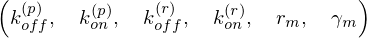

In [10]:
# Define rate constant variables
kp_off, kp_on = sympy.symbols('{k_{off}^{(p)}} {k_{on}^{(p)}}')
kr_off, kr_on = sympy.symbols('{k_{off}^{(r)}} {k_{on}^{(r)}}')

# Define degradation rate and production rate
rm, gm = sympy.symbols('r_m gamma_m')

kp_off, kp_on, kr_off, kr_on, rm, gm

Now let's define a function that given a list of states and a moment of the form $\bb{m^x p^y}$ (as the keys from the dictionary that contains the equation coefficients) it generates an array with the individual moments. For example if the function receives $\bb{m^2 p}$ with three states $\{E, P, R \}$ it returns sympy variables of the form
$$
\ee{m^2 p}_E, \ee{m^2 p}_P, \ee{m^2 p}_R
$$

In [23]:
# Define non-bold variables for m and p
mm, pp = sympy.symbols('m p')
mm, pp

In [82]:
def moment_array(moments, states=['E', 'P', 'R']):
    '''
    Function that generates automatically sympy variables for a given moment
    one for each of the specified states.
    
    Parameters
    ----------
    moments : list.
        List of sympy variables of the form m**x * p**y for which to 
        generate the moment variables.
    states : array-like.
        List containing strings that define each of the states for which
        to define the moment variables.
        
    Returns
    -------
    moments_dict : dictionary.
        dictionary containing all new defined variables associated with each
        moment.
    '''
    # Initialize dictionary to save the variables
    moments_dict = dict()
    
    # Loop through each of the moments adding the variables to the dictionary
    for mom in moments:
        # Process non-zero moments
        if mom != 1:
            # Find the degree of the moment for each of the variables
            if mom.has(m):
                m_degree = sympy.Poly(mom).degree(m)
            else:
                m_degree = 0
            if mom.has(p):
                p_degree = sympy.Poly(mom).degree(p)
            else:
                p_degree = 0

            # Initialize list to save variables
            mom_var = list()

            # Loop through states to generate the variables
            for s in states:
                mom_var.append(sympy.Symbol('{\\langle ' +
                               sympy.latex(mm**m_degree * pp**p_degree) +
                                            '\\rangle}_' + s))
        else:
            # Initialize list to save variables
            mom_var = list()
            
            # Loop through states to generate the variables
            for s in states:
                mom_var.append(sympy.Symbol('{\\langle m^0 p^0' +
                                            '\\rangle}_' + s))
        # Append variables to dictionary
        moments_dict[mom] = mom_var
        
    return moments_dict

In [83]:
moment_array(keys)